In [102]:
import csv
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from datetime import datetime
sns.set_style('white')

In [103]:
initial = pd.read_csv('C:/users/rusty/documents/github/patchseq_gdoc_analysis/patch_seq_log_mouse.csv')

In [104]:
ps = initial[["Date", "Post patch?", "Post patch pipette R", "PCR cycles", "Time spent extracting cytosol", 
              "Time spent retracting pipette", "patch duration", "Picogreen conc. (pg/uL)", 
              "Picogreen yield (pg)", "BA conc. >400 (pg/uL)", "Ratio >400/total", "SM_QC_PF", "Bad dates"]]

ps["SM_QC_PF"] = ps["SM_QC_PF"].astype("category")
ps["PCR cycles"] = ps["PCR cycles"].astype("category")
ps["Bad dates"] = ps["Bad dates"].astype("category")

ps = ps[ps["PCR cycles"] == 21]
ps = ps[ps["SM_QC_PF"] != "cnt"]
ps = ps[ps["Bad dates"] != "x"]
ps = ps.drop("Bad dates", 1)

ps["Ratio >400/total"] = pd.to_numeric(ps["Ratio >400/total"].str.replace(' ',''), errors = 'force')
ps['BA conc. >400 (pg/uL)'] = pd.to_numeric(ps['BA conc. >400 (pg/uL)'].str.replace(' ',''), errors = 'force')
ps['Picogreen conc. (pg/uL)'] = pd.to_numeric(ps['Picogreen conc. (pg/uL)'].str.replace(' ',''), errors = 'force')
ps["Date"] = pd.to_datetime(ps["Date"], format = '%y%m%d')
ps["Time spent extracting cytosol"] = pd.to_numeric(ps["Time spent extracting cytosol"].str.replace(' ',''), errors ='force')
#ps["Time spent retracting pipette"] = pd.to_numeric(ps["Time spent retracting pipette"].str.replace(' ',''), errors ='force')
ps["patch duration"] = pd.to_numeric(ps["patch duration"].str.replace(' ',''), errors ='force')
#ps["Resolution index"] = pd.to_numeric(ps["Resolution index"].str.replace(' ',''), errors ='force')

ps = ps[ps['BA conc. >400 (pg/uL)'] < 8000]
ps = ps[ps["Time spent extracting cytosol"] <= 10]

ps['Time spent retracting pipette'] = ps['Time spent retracting pipette'].fillna(0)
ps.dropna(subset = ["Post patch?", "Time spent extracting cytosol", "patch duration"], inplace = True)

ps.head()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-

,Date,Post patch?,Post patch pipette R,PCR cycles,Time spent extracting cytosol,Time spent retracting pipette,patch duration,Picogreen conc. (pg/uL),Picogreen yield (pg),BA conc. >400 (pg/uL),Ratio >400/total,SM_QC_PF
1634,2017-04-19,Outside-Out,NaN,21.0,1.800000,0.0,4.333333,71.0,NaN,8.0,0.41,fail
1635,2017-04-19,Outside-Out,NaN,21.0,1.666667,0.0,6.566667,608.0,NaN,461.0,0.54,pass
1636,2017-04-19,No-Seal,NaN,21.0,1.433333,0.0,8.033333,6.0,NaN,1.0,1.00,fail
1637,2017-04-19,Nucleated,NaN,21.0,2.350000,0.0,7.416667,1536.0,NaN,979.0,0.71,pass
1638,2017-04-19,Outside-Out,NaN,21.0,2.216667,0.0,4.166667,582.0,NaN,456.0,0.55,pass


In [105]:
ps['recording duration'] = ps['patch duration'] - ps['Time spent extracting cytosol'] - ps['Time spent retracting pipette']
ps = ps[ps['recording duration'] > 0]
ps.head()

,Date,Post patch?,Post patch pipette R,PCR cycles,Time spent extracting cytosol,Time spent retracting pipette,patch duration,Picogreen conc. (pg/uL),Picogreen yield (pg),BA conc. >400 (pg/uL),Ratio >400/total,SM_QC_PF,recording duration
1634,2017-04-19,Outside-Out,NaN,21.0,1.800000,0.0,4.333333,71.0,NaN,8.0,0.41,fail,2.533333
1635,2017-04-19,Outside-Out,NaN,21.0,1.666667,0.0,6.566667,608.0,NaN,461.0,0.54,pass,4.900000
1636,2017-04-19,No-Seal,NaN,21.0,1.433333,0.0,8.033333,6.0,NaN,1.0,1.00,fail,6.600000
1637,2017-04-19,Nucleated,NaN,21.0,2.350000,0.0,7.416667,1536.0,NaN,979.0,0.71,pass,5.066667
1638,2017-04-19,Outside-Out,NaN,21.0,2.216667,0.0,4.166667,582.0,NaN,456.0,0.55,pass,1.950000


In [106]:

def nucleated(x):
    nucleus = x[(x["Post patch?"] == "Nucleated") | (((x["Post patch?"] == "nucleus_visible") | (x["Post patch?"] == "nucleus_present")) & (x["Post patch pipette R"] >= 500))]
    return nucleus

def partial_nucleated(y):
    partial = y[(y["Post patch?"] == 'Partial-Nucleus') | (((y['Post patch?'] == 'nucleus_present') | (y['Post patch?'] == 'nucleus_visible')) & (y["Post patch pipette R"] <= 499))]
    return partial

def outside_out(z):
    outside = z[(z["Post patch?"] == 'Outside-Out') | (((z['Post patch?'] == 'nucleus_absent') | (z['Post patch?'] == 'no_nuclues_visible')) & (z['Post patch pipette R'] >= 500))]
    return outside

def no_seal(w): 
    no = w[(w["Post patch?"] == 'No-Seal') | (((w['Post patch?'] == 'nucleus_absent') | (w['Post patch?'] == 'no_nucleus_visible')) & (w['Post patch pipette R'] <= 499))]
    return no
    
def entire_cell(v):
    entire = v[(v["Post patch?"] == 'Entire-Cell') | (v['Post patch?'] == 'entire_cell')]
    return entire

In [107]:
oo = outside_out(ps)
oo['post patch class'] = 'Outside out'
nu = nucleated(ps)
nu['post patch class'] = 'Nucleated'
ns = no_seal(ps)
ns['post patch class'] = 'No seal'
pn = partial_nucleated(ps)
pn['post patch class'] = 'Partial nucleated'
#ec = entire_cell(ps)
#ec['post patch class'] = 'Entire cell'

frames = (nu, pn, oo, ns)
ps = pd.concat(frames)
ps.head()

C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda2\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

,Date,Post patch?,Post patch pipette R,PCR cycles,Time spent extracting cytosol,Time spent retracting pipette,patch duration,Picogreen conc. (pg/uL),Picogreen yield (pg),BA conc. >400 (pg/uL),Ratio >400/total,SM_QC_PF,recording duration,post patch class
1637,2017-04-19,Nucleated,NaN,21.0,2.350000,0.0,7.416667,1536.0,NaN,979.0,0.71,pass,5.066667,Nucleated
1639,2017-04-19,Nucleated,NaN,21.0,2.183333,0.0,9.466667,1154.0,NaN,1193.0,0.81,pass,7.283333,Nucleated
1641,2017-04-19,Nucleated,NaN,21.0,2.533333,0.0,4.550000,1330.0,NaN,1567.0,0.71,pass,2.016667,Nucleated
1654,2017-04-20,Nucleated,NaN,21.0,2.366667,0.0,3.766667,890.0,NaN,894.0,0.66,pass,1.400000,Nucleated
1663,2017-04-20,Nucleated,NaN,21.0,2.000000,0.0,3.700000,1023.0,NaN,878.0,0.65,pass,1.700000,Nucleated


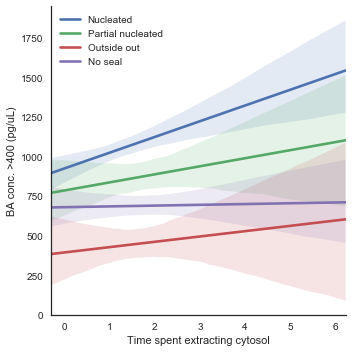

In [108]:
conc = sns.lmplot(x='Time spent extracting cytosol', y='BA conc. >400 (pg/uL)', data=ps, hue='post patch class', 
                  scatter=False, fit_reg=True, legend=False)

axes = conc.axes
#axes[0,0].set_ylim(0,2000)
conc.ax.legend(loc=2)
#sns.despine()
#sns.plt.ylim(0,1.0)
#plt.tight_layout()

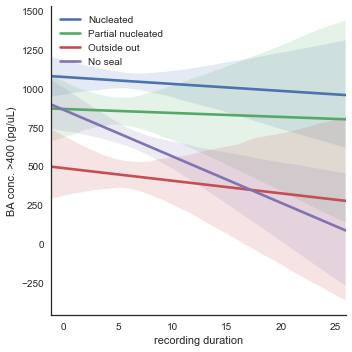

In [109]:
rec = sns.lmplot(x='recording duration', y='BA conc. >400 (pg/uL)', data=ps, hue='post patch class', 
                  scatter=False, fit_reg=True, legend=False)

axes = rec.axes
#axes[0,0].set_ylim(0,2000)
rec.ax.legend(loc=2)
#sns.despine()
#sns.plt.ylim(0,1.0)
#plt.tight_layout()

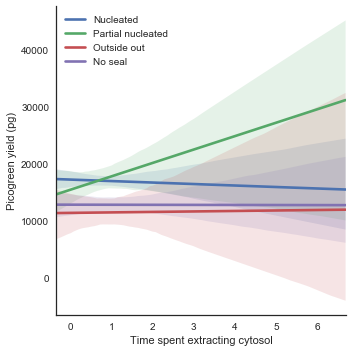

In [52]:
pico = sns.lmplot(x='Time spent extracting cytosol', y='Picogreen yield (pg)', data=ps, hue='post patch class', 
                  scatter=False, fit_reg=True, legend=False)

axes = pico.axes
#axes[0,0].set_ylim(0,2000)
pico.ax.legend(loc=2)
#sns.despine()
#sns.plt.ylim(0,1.0)
#plt.tight_layout()